In [1]:
import csv
import math
from statistics import mean 
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

def p_and_j_finder(First_Stock, Second_Stock):
    Raw_Data_i = []
    First_file ="C:/Users/phbcat/Downloads/"+ First_Stock +".csv"
    with open(First_file) as csvfile:
        reader = csv.reader(csvfile) 
        for row in reader:
            Raw_Data_i.append(row)

    Second_file = "C:/Users/phbcat/Downloads/"+ Second_Stock +".csv"        
    Raw_Data_j = []
    with open(Second_file) as csvfile:
        reader = csv.reader(csvfile) 
        for row in reader: 
            Raw_Data_j.append(row)

    S_i = []
    S_j = []
    S_i_S_j = []
    Squared_i = []
    Squared_j = []
    P_i_j = 0
    d_i_j = 0
    if len(Raw_Data_j) == len(Raw_Data_i):
        Raw_Data_i[1][1] = float(Raw_Data_i[1][1])
        Raw_Data_j[1][1] = float(Raw_Data_j[1][1])
        Ave_S_i = 0
        Ave_S_j = 0
        Ave_S_i_S_j = 0
        Ave_Squared_i = 0
        Ave_Squared_j = 0
        
        for i in range(len(Raw_Data_i)-2):
            if Raw_Data_i[i+1][0] == Raw_Data_j[i+1][0]:
                Raw_Data_i[i+2][1] = float(Raw_Data_i[i+2][1])
                Raw_Data_j[i+2][1] = float(Raw_Data_j[i+2][1])
                S_i.append(math.log(Raw_Data_i[i+2][1]/Raw_Data_i[i+1][1]))
                S_j.append(math.log(Raw_Data_j[i+2][1]/Raw_Data_j[i+1][1]))
                S_i_S_j.append(S_i[i]*S_j[i])
        Ave_S_i = mean(S_i)
        Ave_S_j = mean(S_j)
        Ave_S_i_S_j = mean(S_i_S_j)
        for i in range(len(Raw_Data_i)-2):
            if Raw_Data_i[i+1][0] == Raw_Data_j[i+1][0]:
                Squared_i.append((S_i[i]*S_i[i])- Ave_S_i*Ave_S_i)
                Squared_j.append((S_j[i]*S_j[i])- Ave_S_j*Ave_S_j)
        Ave_Squared_i = mean(Squared_i)
        Ave_Squared_j = mean(Squared_j)
        P_i_j = (Ave_S_i_S_j - (Ave_S_i*Ave_S_j))/(math.sqrt(Ave_Squared_i*Ave_Squared_j))
        if P_i_j > 0.99:
            P_i_j = 1
        if P_i_j < 1:
            d_i_j = math.sqrt(2*(1-P_i_j))
    return[P_i_j,d_i_j]

In [2]:
def All_values(Companies):
    Overall_Pij = []
    Overall_Dij = []
    First_Line_Pij = []
    First_Line_Dij = []
    First_Line_Pij.append("Pij")
    First_Line_Dij.append("Dij")
    for i in range (len(Companies)):
        First_Line_Pij.append(Companies[i])
        First_Line_Dij.append(Companies[i])
    Overall_Pij.append(First_Line_Pij)
    Overall_Dij.append(First_Line_Dij)
    for i in range (len(Companies)):
        Current_Pij = []
        Current_Dij = []
        Current_Pij.append(Companies[i])
        Current_Dij.append(Companies[i])
        for j in range (len(Companies)):
            #print(Companies[j])
            P_i_j = (p_and_j_finder(Companies[i],Companies[j]))
            Current_Pij.append(P_i_j[0])
            Current_Dij.append(P_i_j[1])
        Overall_Pij.append(Current_Pij)
        Overall_Dij.append(Current_Dij)
    return Overall_Pij,Overall_Dij

In [3]:
#print(p_and_j_finder("GBPUSD=X","GBPEUR=X"))

#print(p_and_j_finder("AAPL","AMZN"))

In [4]:
def P_ij(Companies):
    All_Values_Pij, All_Values_Dij = All_values(Companies)
    #print(All_Values_Dij)
    with open('/Users/phbcat/Downloads/writingPij.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        for i in range (len(All_Values_Pij)):
            writer.writerow(All_Values_Pij[i])


In [5]:
def D_ij(Companies):
    All_Values_Pij, All_Values_Dij = All_values(Companies)
    with open('/Users/phbcat/Downloads/writingDij.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        for i in range (len(All_Values_Dij)):
            writer.writerow(All_Values_Dij[i])
            
#"GBPUSD=X",          
    
#Companies = ["AAPL","AMZN","GOOG","MSFT","BP","SHEL","F","GM","TM","TSLA","KR","TGT","WMT","HD","NFLX","DIS","ROKU","WBD","PARA","MANU","HSBC","LYG","NWG","BAC","GS","JPM","PFE","MRNA","BNTX","INO"]
#Companies = ["AAPL","AMZN","GOOG","MSFT","BP","SHEL","F","GM","TM","TSLA","KR","TGT","WMT","HD","NFLX","DIS","ROKU","WBD","PARA","MANU","HSBC","LYG","NWG","BAC","GS","JPM"]
#Companies = ["KR","TGT","WMT","HD"]
#Companies = [ "GBPEUR=X","GBPAUD=X","GBPCAD=X" ,"GBPJPY=X" ,"GBPCHF=X"]
Companies = ["NVDA","BRK-B","UNH","LLY","V","AVGO","PG","JNJ","MA","ADBE","COST","MRK","CVX","ABBV","CRM","PEP"]
#Companies = ["1","2","3"]
P_ij(Companies)
D_ij(Companies)


In [6]:
def Probabilty_plot():
    Raw_Data = []
    file ='/Users/phbcat/Downloads/writingPij.csv'
    with open(file) as csvfile:
        reader = csv.reader(csvfile) 
        for row in reader:
            Raw_Data.append(row)
    min(Raw_Data)
    X = []
    Y = []
    number_of_bins = 20
    for i in range (number_of_bins):
        Y.append(0)
        X.append((i/(number_of_bins/2))-1)
    for i in range (len(Raw_Data)-1):
        for j in range (len(Raw_Data)-1):
            if i+1 > j+1:
                Value  = int(round(float(Raw_Data[i+1][j+1])*(number_of_bins/2),0)+(number_of_bins/2))
                #print(Value)
                Y[Value] += 2/((len(Raw_Data)-1)*(len(Raw_Data)-2))
                #print(X)
    #print(X) 
    plt.xlim(-1.0,1.0)
    plt.plot(X,Y)
    #print(sum(Y))
    plt.title("Probabilty plot")
    plt.xlabel("P_ij")
    plt.ylabel("Probability")
    plt.show()    

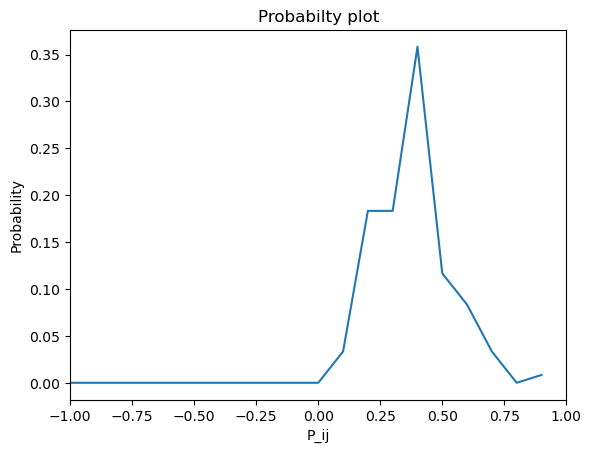

In [7]:
Probabilty_plot()

In [8]:
import csv
import math
from statistics import mean 
import matplotlib.pyplot as plt

def multi_year(First_Stock, Second_Stock):
    year_list = []
    P_i_j_list = []
    Raw_Data_i = []
    Years_i = []
    Stock_i = []
    First_file ="/Users/phbcat/Downloads/"+ First_Stock +".csv"
    with open(First_file) as csvfile:
        reader = csv.reader(csvfile) 
        for row in reader:
            Raw_Data_i.append(row)

    Second_file = "/Users/phbcat/Downloads/"+ Second_Stock +".csv"        
    Raw_Data_j = []
    Years_j = []
    Stock_j = []
    with open(Second_file) as csvfile:
        reader = csv.reader(csvfile) 
        for row in reader: 
            Raw_Data_j.append(row)
            
    for i in range (len(Raw_Data_i)-1):
        Split_i = (str(Raw_Data_i[i+1][0])).split("-")
        Years_i.append(float(Split_i[0]))
        Stock_i.append(float(Raw_Data_i[i+1][1]))
        
        Split_j = (str(Raw_Data_j[i+1][0])).split("-")
        Years_j.append(float(Split_j[0]))
        Stock_j.append(float(Raw_Data_j[i+1][1]))
        

    no_years = max(Years_i)-min(Years_i)

    for j in range (int(no_years)-1):
        S_i = []
        S_j = []
        S_i_S_j = []
        Squared_i = []
        Squared_j = []
        P_i_j = 0
        d_i_j = 0

        Ave_S_i = 0
        Ave_S_j = 0
        Ave_S_i_S_j = 0
        Ave_Squared_i = 0
        Ave_Squared_j = 0
        
        for i in range(len(Stock_i)-1):
            num = 0
            if Years_i[i] == (max(Years_i)-1-j):
                #print(max(Years_i)-1-j)
                num += 1
                S_i.append(math.log(Stock_i[i+1]/Stock_i[i]))
                S_j.append(math.log(Stock_j[i+1]/Stock_j[i]))
                #print(S_i)
                #print(Years_i[i])
                
        #print(S_i)
        #print(S_j)
        Ave_S_i = mean(S_i)
        Ave_S_j = mean(S_j)
        for i in range(len(S_i)):
            Squared_i.append((S_i[i]*S_i[i])- Ave_S_i*Ave_S_i)
            Squared_j.append((S_j[i]*S_j[i])- Ave_S_j*Ave_S_j)
            S_i_S_j.append(S_i[i]*S_j[i])
        Ave_Squared_i = mean(Squared_i)
        Ave_Squared_j = mean(Squared_j)
        Ave_S_i_S_j = mean(S_i_S_j)
        P_i_j = (Ave_S_i_S_j - (Ave_S_i*Ave_S_j))/(math.sqrt(Ave_Squared_i*Ave_Squared_j))
        if P_i_j > 0.99:
            P_i_j = 1
        if P_i_j < 1:
            d_i_j = math.sqrt(2*(1-P_i_j))
        #print(j)
        #print(P_i_j)
        #print(Ave_S_i)
        #print(Ave_Squared_i)
        #print(Ave_Squared_j)
        P_i_j_list.append(P_i_j)
        year_list.append(max(Years_i)-1-j)
    return(P_i_j_list , year_list)

        
    
    
#multi_year("AAPL", "AMZN")


In [9]:
def All_year_PIJ(Companies):
    P_I_J_matrix = []
    Current_row = []
    Current_row.append("Pij for multi-year")
    for i in range(len(Companies)):
        Current_row.append(Companies[i])
    P_I_J_matrix.append(Current_row)
    
    for i in range(len(Companies)):
        Current_row = []
        Current_row.append(Companies[i])
        for j in range (len(Companies)):
            #print(Companies[j])
            P_i_j_list , year_list = multi_year(Companies[i],Companies[j])
            Current_row.append(P_i_j_list)
        P_I_J_matrix.append(Current_row)
    max_min = []
    max_min.append(["year","max","min","ave"])
    for i in range(len(P_i_j_list)):
        P_I_J_list = []
        for j in range(len(Companies)):
            for k in range(len(Companies)):
                if j != k:
                    P_I_J_list.append(P_I_J_matrix[j+1][k+1][i])
        max_min.append([year_list[i],max(P_I_J_list),min(P_I_J_list),mean(P_I_J_list)])       
    
    with open('/Users/phbcat/Downloads/MINMAX.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        for i in range (len(max_min)):
            writer.writerow(max_min[i])
    
    with open('/Users/phbcat/Downloads/multiyear.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        for i in range (len(P_I_J_matrix)):
            writer.writerow(P_I_J_matrix[i])
            
    return(P_I_J_matrix, max_min)

#Companies = ["AAPL","AMZN","GOOG","MSFT","BP","SHEL","F","GM","TM","TSLA","KR","TGT","WMT","HD","NFLX","DIS","ROKU","WBD","PARA","MANU","HSBC","LYG","NWG","BAC","GS","JPM"]
All_year_PIJ(Companies)




([['Pij for multi-year',
   'NVDA',
   'BRK-B',
   'UNH',
   'LLY',
   'V',
   'AVGO',
   'PG',
   'JNJ',
   'MA',
   'ADBE',
   'COST',
   'MRK',
   'CVX',
   'ABBV',
   'CRM',
   'PEP'],
  ['NVDA',
   [1, 1, 1, 1],
   [0.5811881980684578,
    0.06437429494906419,
    0.4986114758576007,
    0.4551809552171834],
   [0.3521722681395006,
    0.028673855939334258,
    0.5223936956948271,
    0.2476294906393287],
   [0.32638394694004697,
    0.12310542375933742,
    0.2550079943313497,
    0.2115287701631129],
   [0.632354793108997,
    0.2645110667725579,
    0.6876810931699449,
    0.5277841355444524],
   [0.8082690341696698,
    0.5734590428911018,
    0.6994102335157234,
    0.5717203219650622],
   [0.2505279503596431,
    -0.08835950886587353,
    0.3346715304522265,
    0.16986033178001503],
   [0.16206325328009552,
    -0.029317952354493658,
    0.33109774092427785,
    0.20992429294471412],
   [0.6471956798386015,
    0.29235011615376527,
    0.6707290526607697,
    0.491993333926

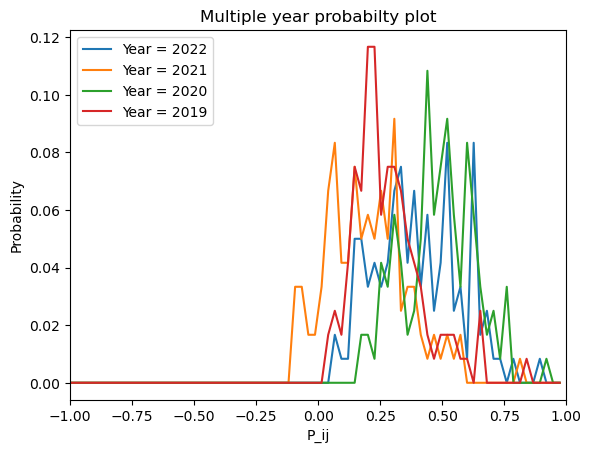

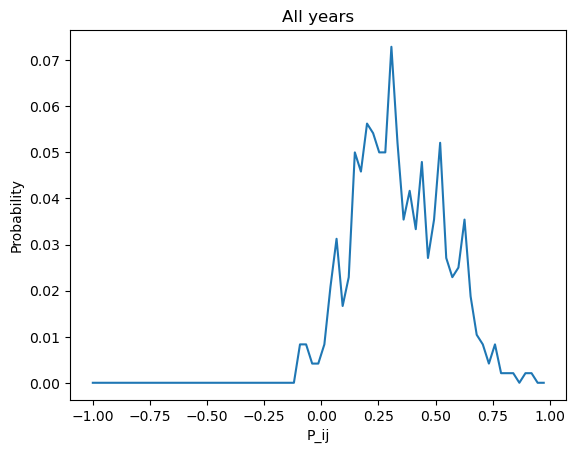

In [10]:
def probaility_multiyear_plot(Companies):
    P_I_J_matrix, max_min = All_year_PIJ(Companies)
    Y_1 = []
    no_bin = 75
    for i in range(no_bin):
        Y_1.append(0)
        
    for k in range(len(P_I_J_matrix[1][1])):
        X = []
        Y = []
        for i in range (no_bin):
            Y.append(0)
            X.append((i/(no_bin/2))-1)
        
        for i in range (len(Companies)):
            for j in range (len(Companies)):
                if i+1 > j+1:
                    Value  = int(round(float(P_I_J_matrix[i+1][j+1][k])*(no_bin/2),0)+(no_bin/2))
                    #print(Value)
                    Y[Value] += 2/((len(Companies))*(len(Companies)-1))
                    Y_1[Value] += 2/((len(Companies))*(len(Companies)-1)*len(P_I_J_matrix[1][1]))
                    #print(X)

        #plt.title(max_min[k+1][0])
        text = 'Year = '+str(int(max_min[k+1][0]))
        plt.plot(X,Y,label = text)
    plt.xlim(-1.0,1.0)
    plt.xlabel("P_ij")
    plt.ylabel("Probability")
    plt.title("Multiple year probabilty plot")
    plt.legend()
    plt.show()
    #print(sum(Y))     
    plt.title("All years")    
    plt.xlabel("P_ij")
    plt.ylabel("Probability")
    plt.plot(X,Y_1)
    plt.show()


probaility_multiyear_plot(Companies)

In [11]:
import numpy as np
from scipy.sparse.csgraph import minimum_spanning_tree
import csv
import math
from statistics import mean 
import matplotlib.pyplot as plt

Raw_Data = []
Companines = []
file ='/Users/phbcat/Downloads/writingDij.csv'
with open(file) as csvfile:
    reader = csv.reader(csvfile) 
    for row in reader:
        Raw_Data.append(row)

Raw_Data_1 = []
for i in range(len(Raw_Data)-1):
    Current = []
    for j in range(len(Raw_Data)-1):
        Current.append(float(Raw_Data[i+1][j+1]))
    Raw_Data_1.append(Current)
    Companines.append(Raw_Data[i+1][0])
#print(Raw_Data_1)

#print(Companines)
    

tree = minimum_spanning_tree(Raw_Data_1)
#print(tree)
#print(tree.toarray())

In [12]:
#print(tree)
tree_str = str(tree)
print(tree)

#plt.text(0,0,Companines[0])

  (0, 5)	0.8189467225390616
  (0, 9)	0.8362294730208201
  (1, 12)	0.9112011039024598
  (2, 1)	1.0327671552309232
  (2, 13)	1.0544526991635035
  (4, 1)	0.8382792552769824
  (4, 8)	0.46696293856713433
  (7, 3)	1.0521810170285226
  (7, 6)	0.9463301915954249
  (7, 11)	1.0231290633035015
  (9, 4)	0.9170030144402166
  (9, 10)	0.9796800887767843
  (14, 9)	0.8057171240337035
  (15, 6)	0.8233777392760562
  (15, 10)	1.00890050580366


In [13]:
#print(len(Companines))
Min_spanning = []
for i in range(len(Companines)):
    for j in range(len(Companines)):
        if tree.toarray()[i][j]>0:
            #print("("+str(Companines[i]) +","+ str(Companines[j])+")" +"    "+ str(tree.toarray()[i][j]))
            Min_spanning.append([Companines[i],Companines[j],i,j,tree.toarray()[i][j]])
print(Min_spanning)


[['NVDA', 'AVGO', 0, 5, 0.8189467225390616], ['NVDA', 'ADBE', 0, 9, 0.8362294730208201], ['BRK-B', 'CVX', 1, 12, 0.9112011039024598], ['UNH', 'BRK-B', 2, 1, 1.0327671552309232], ['UNH', 'ABBV', 2, 13, 1.0544526991635035], ['V', 'BRK-B', 4, 1, 0.8382792552769824], ['V', 'MA', 4, 8, 0.46696293856713433], ['JNJ', 'LLY', 7, 3, 1.0521810170285226], ['JNJ', 'PG', 7, 6, 0.9463301915954249], ['JNJ', 'MRK', 7, 11, 1.0231290633035015], ['ADBE', 'V', 9, 4, 0.9170030144402166], ['ADBE', 'COST', 9, 10, 0.9796800887767843], ['CRM', 'ADBE', 14, 9, 0.8057171240337035], ['PEP', 'PG', 15, 6, 0.8233777392760562], ['PEP', 'COST', 15, 10, 1.00890050580366]]


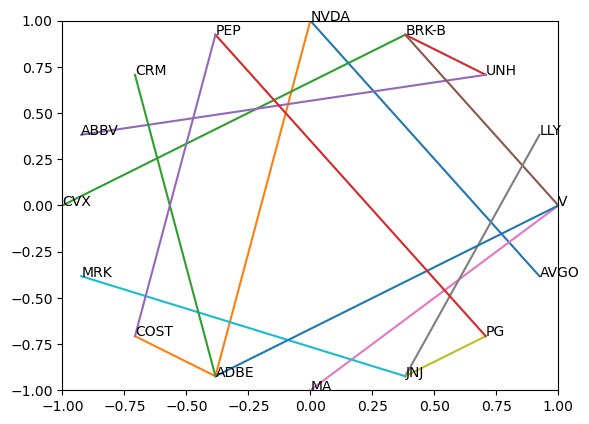

In [14]:
plt.ylim(-1.0,1.0)
plt.xlim(-1.0,1.0)
for i in range(len(Companines)):
    Angle = 2*math.pi*i/len(Companines)
    plt.text(math.sin(Angle),math.cos(Angle),Companines[i])

for i in range(len(Companines)-1):
    X = []
    Y = []
    Angle_1 = 2*math.pi*Min_spanning[i][2]/len(Companines)
    Angle_2 = 2*math.pi*Min_spanning[i][3]/len(Companines)

    X.append(math.sin(Angle_1))
    X.append(math.sin(Angle_2))
    Y.append(math.cos(Angle_1))
    Y.append(math.cos(Angle_2))
    #print(X)
    plt.plot(X,Y)
plt.show()

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
#G = nx.Graph()
#G.add_edges_from(
#    [
#        (0, 1, {"weight": 4}),
#        (0, 7, {"weight": 8}),
#        (1, 7, {"weight": 11}),
#        (1, 2, {"weight": 8}),
#        (2, 8, {"weight": 2}),
#        (2, 5, {"weight": 4}),
#        (2, 3, {"weight": 7}),
#        (3, 4, {"weight": 9}),
#        (3, 5, {"weight": 14}),
#        (4, 5, {"weight": 10}),
#        (5, 6, {"weight": 2}),
#        (6, 8, {"weight": 6}),
#        (7, 8, {"weight": 7}),
#    ]
#)

#G.add_edges_from(
#    [
#        ("NVDA", "AVGO"),
#        ("BRK-B", "UNH"),
#        ("LLY", "JNJ"),
#        ("V", "BRK-B"),
#        ("V", "MA"),
#        ("JNJ", "PG"),
#        ("JNJ", "MRK"),
#        ("ADBE", "NVDA"),
#        ("ADBE", "ACN"),
#        ("CVX", "BRK-B"),
#        ("ABBV", "UNH"),
#        ("CRM", "ADBE"),
#        ("PEP", "PG"),
#        ("PEP", "COST"),
#        ("ACN", "V"),
#        ("ACN", "COST"),
#    ]
#)




#T = nx.minimum_spanning_tree(G)
#pos = nx.spring_layout(G)
#nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500)
#nx.draw_networkx_edges(G, pos, edge_color="grey")
#nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
#nx.draw_networkx_edge_labels(
#    G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)}
#)
#nx.draw_networkx_edges(T, pos, edge_color="green", width=2)
#plt.axis("off")
#plt.show()
# taken from and used inmy own way https://networkx.org/documentation/stable/auto_examples/graph/plot_mst.html

#print(T)

In [16]:
for i in range(len(Min_spanning)):
    print(Min_spanning[i][0],Min_spanning[i][1],round(Min_spanning[i][4],2))

NVDA AVGO 0.82
NVDA ADBE 0.84
BRK-B CVX 0.91
UNH BRK-B 1.03
UNH ABBV 1.05
V BRK-B 0.84
V MA 0.47
JNJ LLY 1.05
JNJ PG 0.95
JNJ MRK 1.02
ADBE V 0.92
ADBE COST 0.98
CRM ADBE 0.81
PEP PG 0.82
PEP COST 1.01


In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
#F = nx.Graph()
#F.add_edges_from(
#    [
#        ("AAPL", "MSFT", {"weight": round(0.7315033033991556,2)}),
#        ("AAPL", "TSLA", {"weight": round(0.9814752316808588,2)}),
#        ("AMZN", "NFLX", {"weight": round(0.9626414416539548,2)}),
#        ("GOOG", "AMZN", {"weight": round(0.7842754642883406,2)}),
#        ("GOOG", "MSFT", {"weight": round(0.7598098261798631,2)}),
#        ("BP", "SHEL", {"weight": round(0.4727180160312776,2)}),
#        ("F", "GM", {"weight": round(0.6524771314627148,2)}),
#        ("GM", "BAC", {"weight": round(0.8375514060827229,2)}),
#        ("WMT", "KR", {"weight": round(1.0785540212495677,2)}),
#        ("WMT", "TGT", {"weight": round(1.0649110640363406,2)}),
#        ("HD", "MSFT", {"weight": round(0.9413917365635084,2)}),
#        ("HD", "TGT", {"weight": round(1.0493601870906304,2)}),
#        ("NFLX", "ROKU", {"weight": round(1.0379275865977198,2)}),
#        ("DIS", "WBD", {"weight": round(0.997109360291094,2)}),
#        ("DIS", "GS", {"weight": round(0.9107081855099266,2)}),
#        ("WBD", "PARA", {"weight": round(0.7946898950644942,2)}),
#        ("MANU", "DIS", {"weight": round(1.181677884864833,2)}),
#        ("HSBC", "LYG", {"weight": round(0.7755967461372312,2)}),
#        ("LYG", "BP", {"weight": round(0.8980260496868829,2)}),
#        ("LYG", "JPM", {"weight": round(0.8154243749440454,2)}),
#        ("NWG", "LYG", {"weight": round(0.5796038783583957,2)}),
#        ("BAC", "TM", {"weight": round(0.9860624746895731,2)}),
#        ("BAC", "JPM", {"weight": round(0.49904590673565746,2)}),
#        ("GS", "HD", {"weight": round(0.9567385212166776,2)}),
#        ("GS", "BAC", {"weight": round(0.6160751586053962,2)}),
#    ]
#)




#T = nx.minimum_spanning_tree(F)
#pos = nx.spring_layout(F)
#nx.draw_networkx_nodes(F, pos, node_color="lightblue", node_size=500)
#nx.draw_networkx_edges(F, pos, edge_color="grey")
#nx.draw_networkx_labels(F, pos, font_size=10, font_family="sans-serif")
#nx.draw_networkx_edge_labels(
#    F, pos, edge_labels={(u, v): d["weight"] for u, v, d in F.edges(data=True)}
#)
#nx.draw_networkx_edges(T, pos, edge_color="green", width=2)
#plt.axis("off")
#plt.show()

In [18]:
X = []
Y = []
max_distance = 0
for i in range(len(Min_spanning)):
    if Min_spanning[i][4]>max_distance:
        max_distance = Min_spanning[i][4]

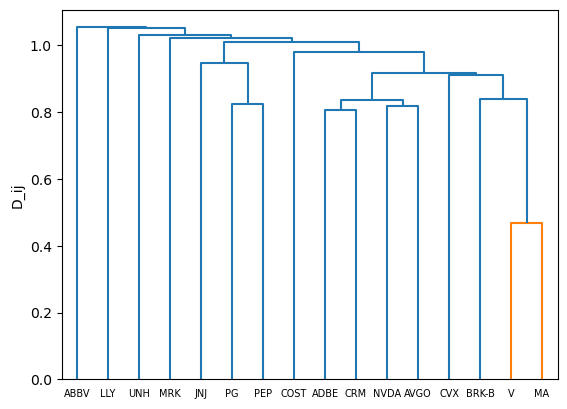

In [22]:
import pandas as pd

Distance = squareform(Raw_Data_1)
linkage_matrix = linkage(Distance, "single")
dendrogram(linkage_matrix, labels=Companies, leaf_font_size=7)
plt.ylabel("D_ij")
plt.show()

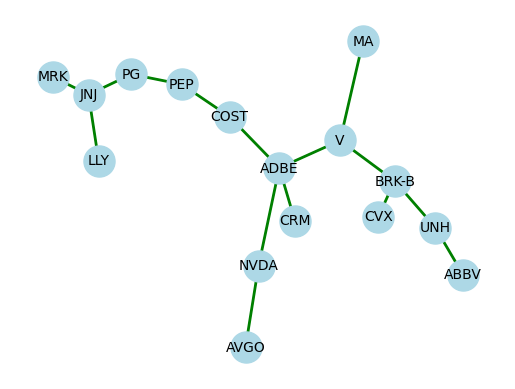

In [21]:
G = nx.Graph()
TREE_ARRAY = tree.toarray()
#TREE_ARRAY = Distance
for i in range(len(TREE_ARRAY)):
    for j in range(len(TREE_ARRAY)):
        if TREE_ARRAY[i][j]!=0:
            G.add_edges_from(
                [
                   (Companies[i], Companies[j], {"weight": round(TREE_ARRAY[i][j],2)} ) 
                ]
            )

#G = nx.minimum_spanning_tree(G)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G, pos, edge_color="grey")
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
#nx.draw_networkx_edge_labels(
#    G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)}
#)
nx.draw_networkx_edges(G, pos, edge_color="green", width=2)
plt.axis("off")
plt.show()